In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('option_train.csv')

In [ ]:
df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


#Value(C): Current option value
#S: Current asset value
#K: Strike price of option
#r: Annual interest rate
#tau:Time to maturity(inyears)
#BS:TheBlack-Scholesformula was applied to this data(using some 𝜎)to get C_pred. and If an option has C_pred–C > 0,i.e.,the prediction overestimated the option value, we associate that option by(Over);otherwise, we associate that option with(Under).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1678 non-null   float64
 1   S       1679 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1679 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(5), object(1)
memory usage: 78.9+ KB


In [ ]:
df.shape


(1680, 6)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().sum()

Value    2
S        1
K        2
tau      1
r        0
BS       0
dtype: int64

Let us check for outliers and erroneous entries using boxplots

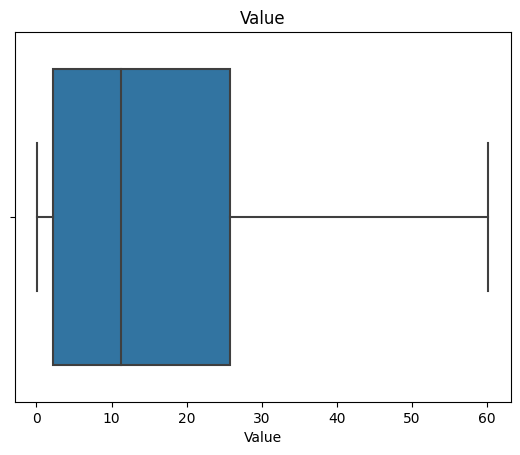

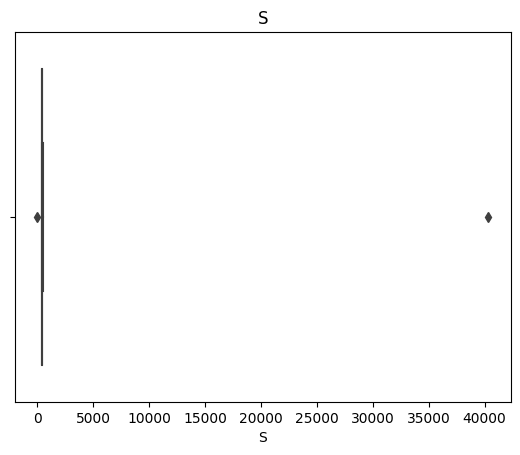

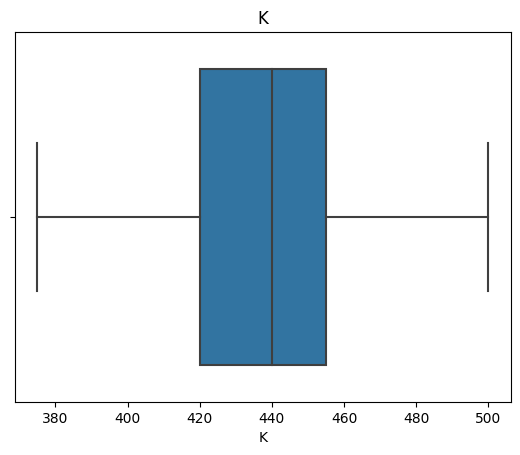

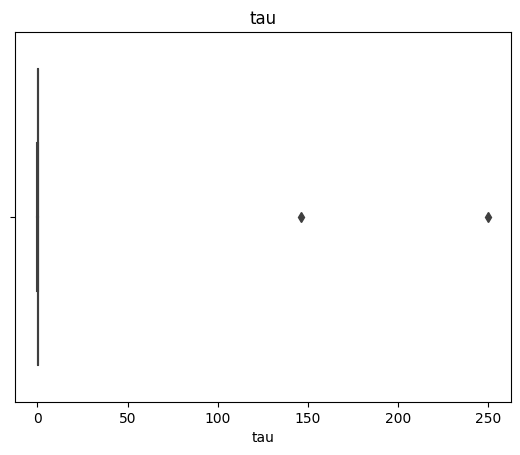

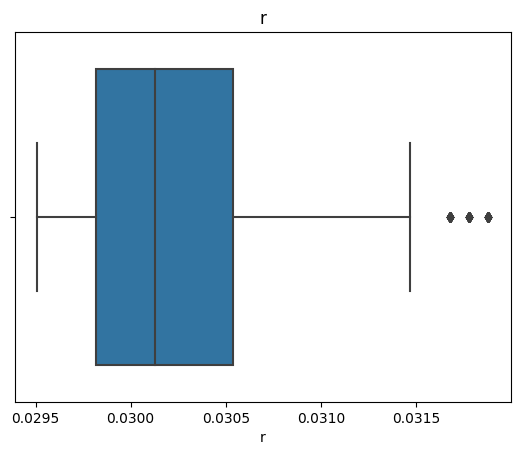

In [ ]:
# loop through each column and create a boxplot
for col in df.columns:
    if (col != 'BS'):
        fig, ax = plt.subplots()
        sns.boxplot(x=df[col], ax=ax)
        ax.set_title(col)


From the above graph we can see that clolums S and Time of maturity have one or two extreme values which are not likely to be possible.
Hence, we can replace those values with the median of that column and clean the dataset.

In [ ]:
new1 = df[df['S'].between(30000, 50000)]
new1

,Value,S,K,tau,r,BS
47,11.451273,40333.0,425.0,0.043651,0.03147,Under


In [ ]:
new2 = df[df['S'].between(0, 10)]
new2

,Value,S,K,tau,r,BS
879,4.125,0.0,455.0,0.170635,0.03003,Over


In [ ]:
tau = df[df['tau'].between(100, 300)]
tau

,Value,S,K,tau,r,BS
12,2.315001,448.688109,470.0,250.0,0.03013,Over
33,2.565000,445.042240,455.0,146.0,0.03003,Over


In [ ]:
median_value = df['S'].median()
# Replace multiple outlier values with the median value
outlier_values = [40333.0, 0.0] # replace with your outlier values
replace_dict = {value: median_value for value in outlier_values}
df['S'] = df['S'].replace(replace_dict)

In [ ]:
median_value = df['tau'].median()
# Replace multiple outlier values with the median value
outlier_values = [250.0, 146.0] # replace with your outlier values
replace_dict = {value: median_value for value in outlier_values}
df['tau'] = df['tau'].replace(replace_dict)

Now let us check for skewness.

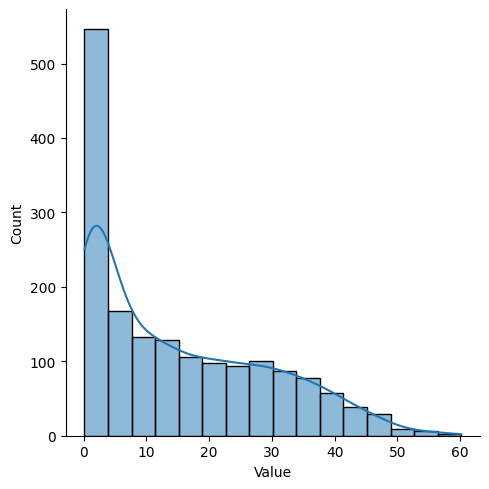

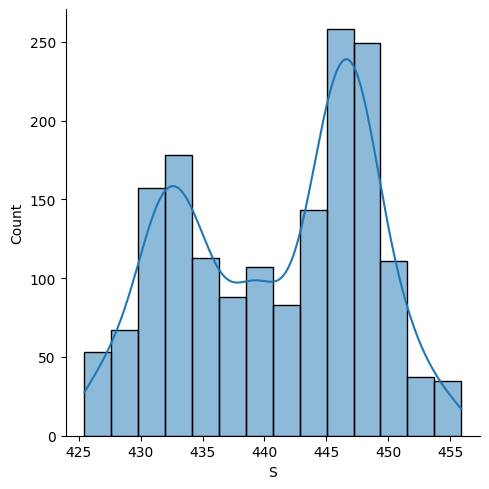

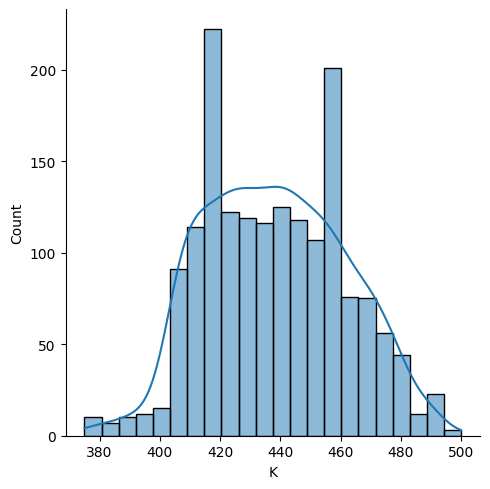

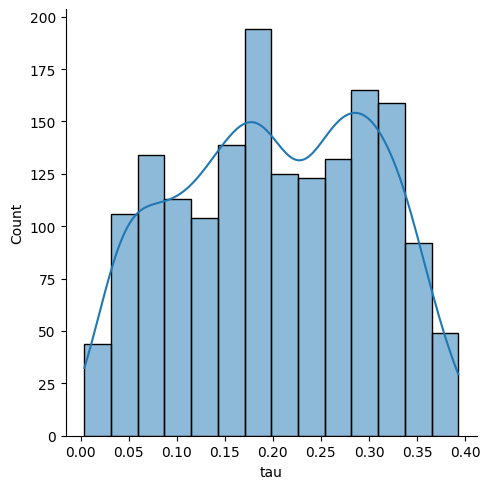

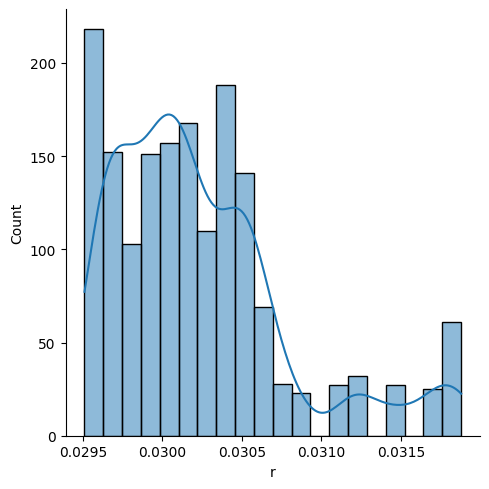

In [ ]:
# loop through the columns and create a displot for each
for col in df.columns:
    if(col != 'BS'):
        sns.displot(df[col], kde = True)


From above distribution plots we can see that column Value is right skewed

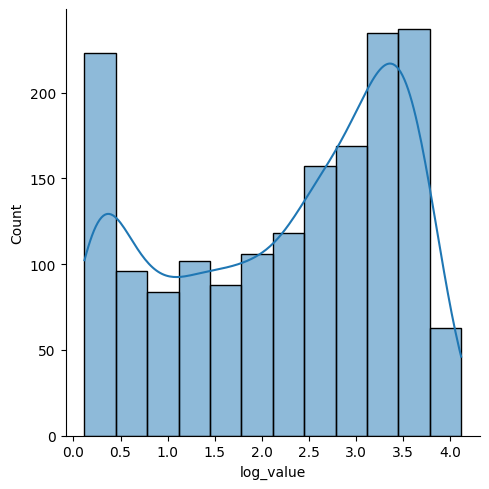

In [ ]:
df['log_value'] = np.log1p(df.Value)

# plot the distribution after transformation
sns.displot(df['log_value'], kde=True)




In [ ]:
corr_matrix = df.corr()

<ipython-input-16-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

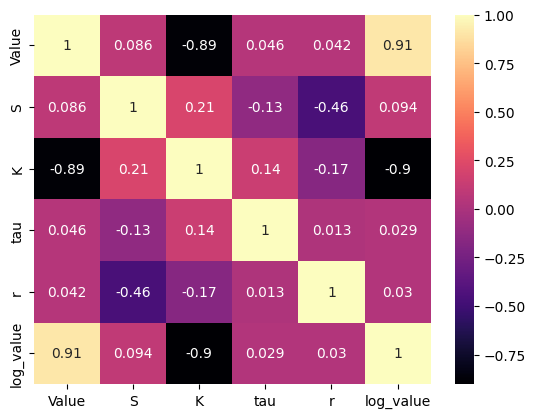

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='magma')


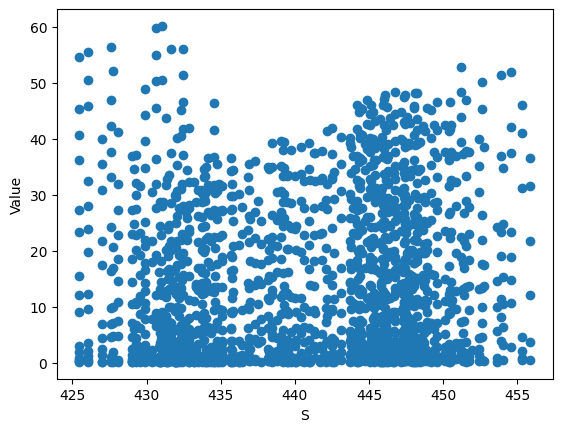

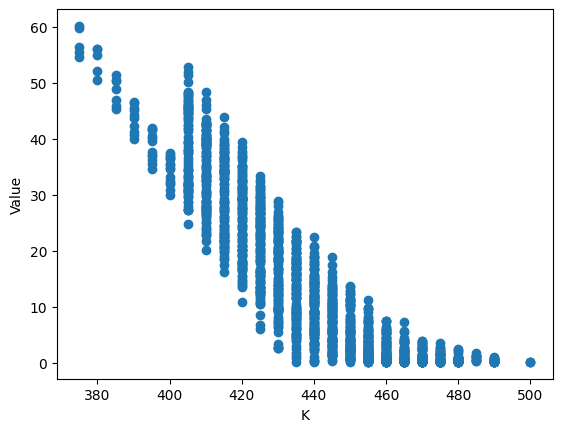

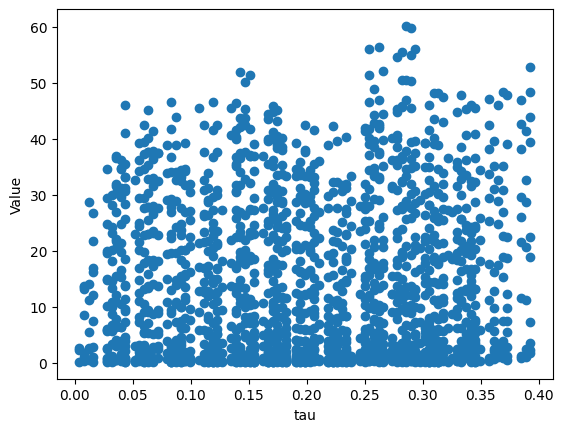

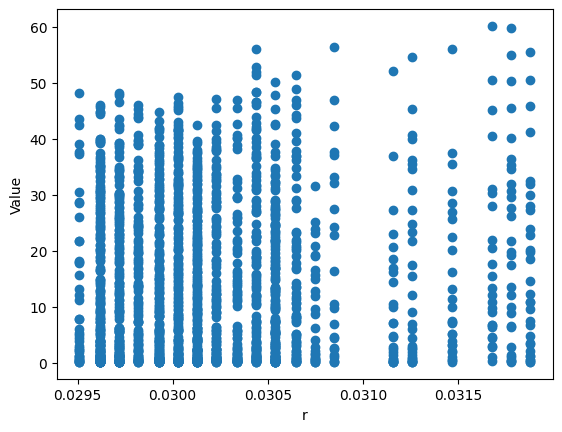

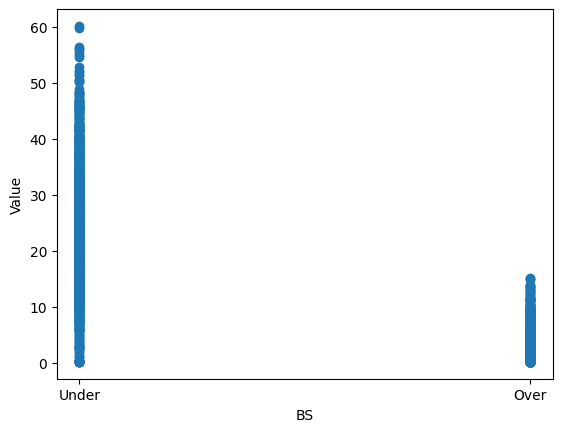

In [ ]:
#let us find out the distribution for values

for col in df.columns:
    if (col != 'Value') and (col != 'log_value'):
        plt.scatter(df[col], df['Value'])
        plt.xlabel(col)
        plt.ylabel('Value')
        plt.show()


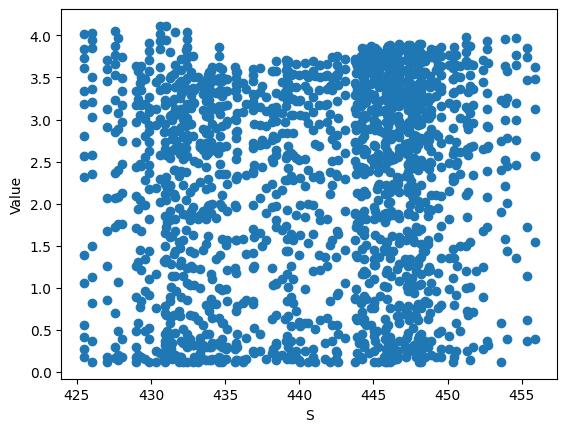

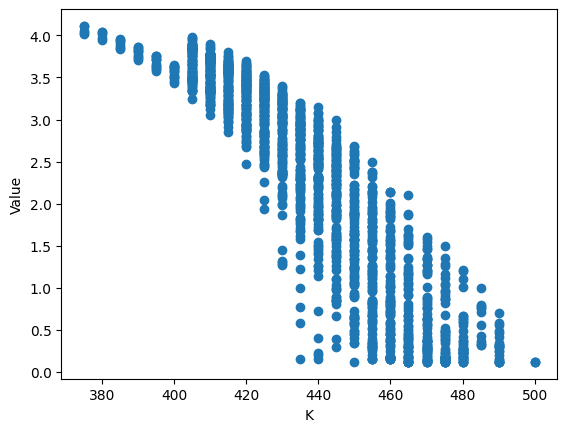

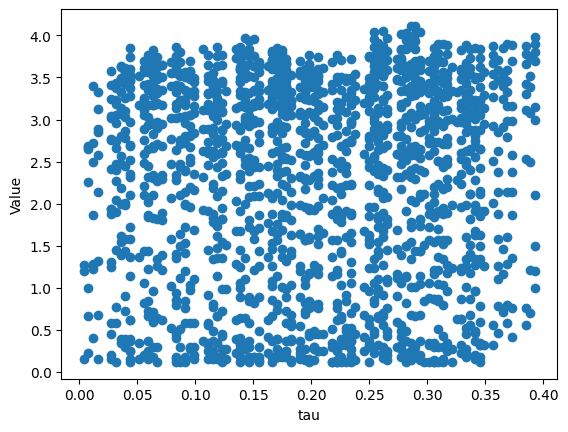

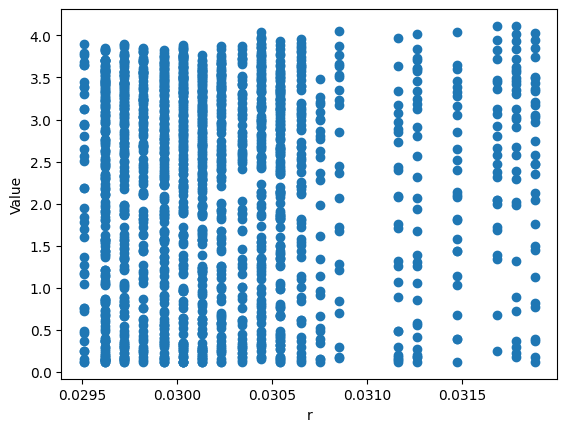

In [ ]:
#let us find out the distribution for log_values

for col in df.columns:
    if (col != 'Value') and (col != 'log_value') and (col != 'BS'):
        plt.scatter(df[col], df['log_value'])
        plt.xlabel(col)
        plt.ylabel('Value')
        plt.show()               

We can see that there is no linear relataionship between the independent and dependent variables. So liner regression might not be the best model.

Let's fill the null values with median

In [ ]:

# Select all columns except 'column_to_exclude'
subset_df = df.loc[:, df.columns != 'BS']
# Fill the NaN values in the subset dataframe with the median
subset_df.fillna(subset_df.median(), inplace=True)
# Concatenate the filled subset dataframe with the excluded column
df = pd.concat([subset_df, df['BS']], axis=1)

<ipython-input-20-c5f29e089a29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.fillna(subset_df.median(), inplace=True)
<ipython-input-20-c5f29e089a29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.fillna(subset_df.median(), inplace=True)
<ipython-input-20-c5f29e089a29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
df.isna().sum()

Value        0
S            0
K            0
tau          0
r            0
log_value    0
BS           0
dtype: int64

As there is no linear relationship between the dependent and independent variables, linear regression may not be the best model to predict the output variable.

We can use Support Vector regression, Decision tree regression, random forest regression or GB booster regression.

<h1> Gradient Boosting Regression


Let us use Randomized Search CV to choose th ebest parameters for GB regression. (Hypertuning)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Separate the response variable and the predictors
X = df.drop(['Value','log_value','BS'], axis=1)
y = df['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Selecting lerning rates
learning_rate= [0.01, 0.1, 1.0]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
print(param_grid)


{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'learning_rate': [0.01, 0.1, 1.0]}


In [ ]:
gb_Model = GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gb = RandomizedSearchCV(estimator = gb_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)


In [ ]:
gb.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

In [ ]:
best_params = gb.best_params_


In [ ]:
regressor = GradientBoostingRegressor(**best_params,random_state=1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2_gb = r2_score(y_test, y_pred)
print("Out-of-sample R-squared: ", r2_gb)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

Out-of-sample R-squared:  0.9966939624920552


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

We can comapare the actual data with the predicted data side by side.

In [ ]:
# Compare the predicted and actual values
for i in range(len(y_test)):
    print(f"Predicted value: {y_pred[i]}, actual value: {y_test.iloc[i]}")

Predicted value: 1.0341682471725921, actual value: 1.15500418
Predicted value: 0.09378544109947637, actual value: 0.220000002
Predicted value: 29.556918772386616, actual value: 30.63055053
Predicted value: 0.041458937339934644, actual value: 0.185000001
Predicted value: 12.560600744483692, actual value: 11.81780445
Predicted value: 17.017787911343472, actual value: 16.51921407
Predicted value: 20.067359285887107, actual value: 20.11411648
Predicted value: 4.414610002431015, actual value: 4.374999998
Predicted value: 1.5875274910246044, actual value: 1.315000003
Predicted value: 11.738612161595258, actual value: 12.25
Predicted value: 1.1871214774819487, actual value: 1.254999999
Predicted value: 18.126020643188568, actual value: 18.66577873
Predicted value: 33.21355328291932, actual value: 33.65657155
Predicted value: 0.5126078735214313, actual value: 0.625000049
Predicted value: 11.669751067999261, actual value: 13.9487306
Predicted value: 23.985626441990398, actual value: 23.27208516

<ipython-input-33-08421c612c17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( y_pred - y_test)


<Axes: xlabel='Value', ylabel='Density'>

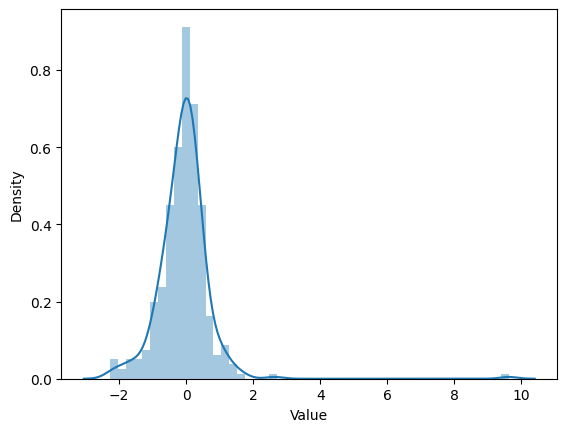

In [ ]:
sns.distplot( y_pred - y_test)

[link text](https://)We see the that predicted value and the actual value forms a Gaussian Distribution, which indicates our model worked well.

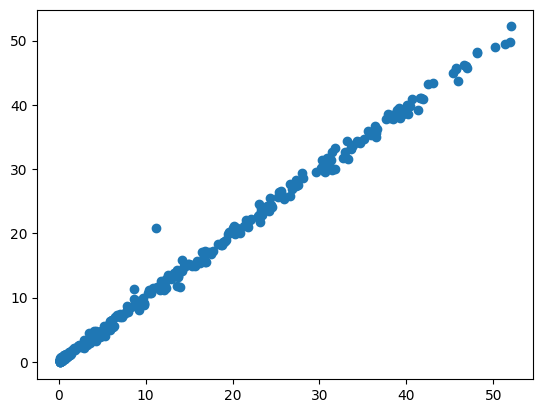

In [ ]:
plt.scatter(y_test,y_pred)

The scatter plot qlso shows a linear relationship between the predicted value and actual value, except a few outliers.

<h1> Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a DecisionTreeRegressor object and fit the model to the training data
dt = DecisionTreeRegressor(max_depth=3, random_state=1)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the R-squared score of the model
r2_dtree = r2_score(y_test, y_pred)
print('Out-of-sample R-squared:', r2_dtree)

Out-of-sample R-squared: 0.8847762412133585


<h1> Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Number of trees in random forest
n_estimators = [50,100,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestRegressor()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)


In [ ]:
rfc.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=2)

In [ ]:
best_params = rfc.best_params_


In [ ]:
# initialize the Random Forest Regressor model with some parameters
rf_model = RandomForestRegressor(**best_params, random_state=1)

# fit the model with the training data
rf_model.fit(X_train, y_train)

# make predictions using the testing data
y_pred = rf_model.predict(X_test)

# evaluate the model using R-squared metric
r2_regfor = r2_score(y_test, y_pred)
print("Out-of-sample R-squared:", r2_regfor)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Out-of-sample R-squared: 0.9938311870930712


In [ ]:
# create a DataFrame to compare the R-squared values of the models
df_r2 = pd.DataFrame({'Model': ['Gradient Boosting Regression','Decision Tree Regression', 'Random Forest Regression'],
                      'Out-of-sample R-squared:': [r2_gb, r2_dtree,r2_regfor]})
print(df_r2)

                          Model  Out-of-sample R-squared:
0  Gradient Boosting Regression                  0.996694
1      Decision Tree Regression                  0.884776
2      Random Forest Regression                  0.993831


So from above we see that Gradient Boosting regression is the best model for the above regression.

Now we apply the polynomial regression to the test data.

In [ ]:

# Load the test dataset as a Pandas dataframe
test_data = pd.read_csv('option_test_wolabel.csv')
# create polynomial features
#poly = PolynomialFeatures(degree=2)

# Apply the trained machine learning model to the preprocessed test dataset to generate predictions
predictions = regressor.predict(test_data)

# Add the predictions to the test dataset as a new column
test_data['Value'] = predictions

# Save the test dataset with the predictions to a separate sheet in an Excel file using Pandas
with pd.ExcelWriter('test_data_predictions.xlsx') as writer:
    test_data.to_excel(writer, sheet_name='Test Data Predictions', index=False)


<b>Now we have to build a classification model for the BS column </b>

In [ ]:
df['BS'] = df['BS'].replace({'Over': 1, 'Under': 0})
df.head()

,Value,S,K,tau,r,log_value,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,3.121060,0
1,0.125000,427.015526,465.0,0.166667,0.03126,0.117783,1
2,20.691244,427.762336,415.0,0.265873,0.03116,3.076909,0
3,1.035002,451.711658,460.0,0.063492,0.02972,0.710497,1
4,39.553020,446.718974,410.0,0.166667,0.02962,3.702610,0


<h1> Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Separate the response variable and the predictors
X = df.drop(['Value','log_value','BS'], axis=1)
y = df['BS']

# assume X is the matrix of predictor variables and y is the binary response variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the scaler to both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_logistic.predict(X_test_scaled)
# create and fit the logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# make predictions on the test set
y_pred = model_logistic.predict(X_test)

# evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy1)
print("Confusion matrix:", confusion_mat)


Accuracy: 0.9166666666666666
Confusion matrix: [[182  18]
 [ 10 126]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       200
           1       0.88      0.93      0.90       136

    accuracy                           0.92       336
   macro avg       0.91      0.92      0.91       336
weighted avg       0.92      0.92      0.92       336



In [ ]:
# Calculate classification error
total = len(y_test)
incorrect = (y_test != y_pred).sum()
classification_error1 = incorrect / total

# Print classification error
print("Classification error:", classification_error1)

Classification error: 0.08333333333333333


<h1> Naive bayes

In [ ]:
# import required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# assume X is the matrix of predictor variables and y is the binary response variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create a Naive Bayes model
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(X_train, y_train)

y_pred = model_naive_bayes.predict(X_test)

# perform 5-fold cross-validation and calculate accuracy
accuracy_scores = cross_val_score(model_naive_bayes, X, y, cv=5, scoring='accuracy')
accuracy2 = accuracy_scores.mean()

print(f'Average accuracy: {accuracy2}')
print(classification_report(y_test,y_pred))

# Calculate classification error
total = len(y_test)
incorrect = (y_test != y_pred).sum()
classification_error2 = incorrect / total

# Print classification error
print("Classification error:", classification_error2)

Average accuracy: 0.8839285714285714
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       200
           1       0.86      0.93      0.89       136

    accuracy                           0.91       336
   macro avg       0.90      0.91      0.91       336
weighted avg       0.91      0.91      0.91       336

Classification error: 0.09226190476190477


<h1> KNN neighbours

Let's try to find the value of optimal k

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the scaler to both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter values that should be searched
k_range = list(range(1, 31))

param_grid = {'n_neighbors': k_range}

# Create a GridSearchCV object
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
knn_grid.fit(X_train_scaled, y_train)

# Print the best k value and the corresponding accuracy
print("Best k value: ", knn_grid.best_params_['n_neighbors'])
print("Best accuracy: ", knn_grid.best_score_)


Best k value:  30
Best accuracy:  0.9203961604616323


In [ ]:
best_k_value = knn_grid.best_params_

# build the KNN model
knn = KNeighborsClassifier(**best_k_value)
knn.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# calculate the accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy3)

# Calculate classification error
total = len(y_test)
incorrect = (y_test != y_pred).sum()
classification_error3 = incorrect / total

# Print classification error
print("Classification error:", classification_error3)

Accuracy: 0.9404761904761905
Classification error: 0.05952380952380952


Let us compare the actual value with the predited values

In [ ]:
# Compare the predicted and actual values
for i in range(len(y_test)):
    print(f"Predicted value: {y_pred[i]}, actual value: {y_test.iloc[i]}") 

Predicted value: 1, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual value: 0
Predicted value: 1, actual value: 1
Predicted value: 0, actual v

Let us have a look at the confusion matrix

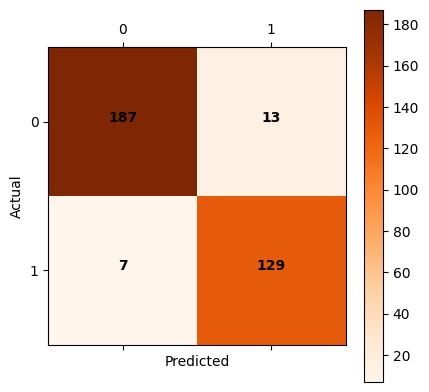

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with true positives/negatives and false positives/negatives
plt.matshow(cm, cmap=plt.cm.Oranges)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="black",weight="bold")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
print('\nTrue Positives = ', cm[0,0])
print('\nTrue Negatives = ', cm[1,1])
print('\nFalse Positives = ', cm[0,1])
print('\nFalse Positives = ', cm[1,0])


True Positives =  187

True Negatives =  129

False Positives =  13

False Positives =  7


In [ ]:
# y_true: true labels of the test set, y_pred: predicted labels of the test set
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("F1 score: {:.2f}".format(f1))

Accuracy: 0.94
Precision: 0.91
F1 score: 0.93


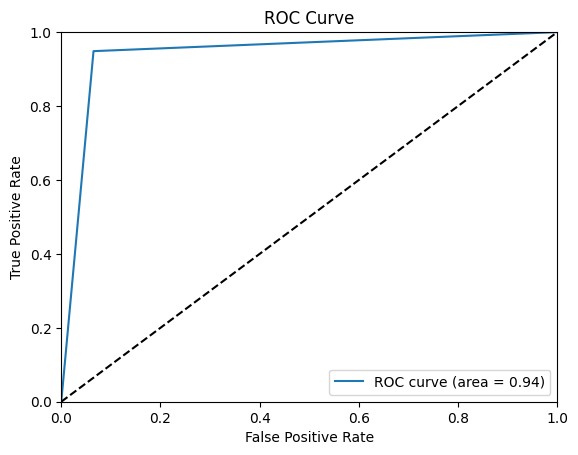

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


The AUC value ranges from 0 to 1, where a value of 0.5 indicates that the model is performing no better than chance (random guessing), and a value of 1 indicates that the model is perfectly predicting the positive and negative classes.

In the case of an AUC value of 0.94, this indicates that the model is correctly classifying 94% of the instances, on average, across different classification thresholds. This suggests that the model has a high level of accuracy in distinguishing between the positive and negative classes.

<h1> Random forest classifier

Random forest is not as sensitive to feature scaling as some other machine learning models, such as K-Nearest Neighbors (KNN) or linear models like Linear Regression or Logistic Regression.

So we can apply spme hypertuning methods in RandomForestClassifier model using GridSearchCv to increase the accuracy. 

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Number of trees in random forest
n_estimators = [50,100,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_Model = RandomForestClassifier()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rfc.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=2)

 It means that the search algorithm is testing 10 different combinations of hyperparameters (candidates) using 10-fold cross-validation for each combination, resulting in a total of 100 fits.

In other words, the search algorithm is fitting the model 100 times with different hyperparameters and evaluating its performance using cross-validation to find the best combination of hyperparameters that maximizes the chosen performance metric. The number of candidates and folds can be adjusted using the n_iter and cv parameters, respectively, when using RandomizedSearchCV.





In [ ]:
best_params = rfc.best_params_


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(**best_params, random_state=1)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4)

# Calculate classification error
total = len(y_test)
incorrect = (y_test != y_pred).sum()
classification_error4 = incorrect / total

# Print classification error
print("Classification error:", classification_error4)

Accuracy: 0.9375
Classification error: 0.0625


**<h1> Support Vector Machine**




In [ ]:
from sklearn.svm import SVC

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the scaler to both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM classifier model
svm = SVC(kernel='linear', C=1.0, random_state=0)

# Fit the model to the training data
svm.fit(X_train_scaled, y_train)

# Predict the classes of the testing data
y_pred = svm.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy5 = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy5)
# Calculate classification error
total = len(y_test)
incorrect = (y_test != y_pred).sum()
classification_error5 = incorrect / total

# Print classification error
print("Classification error:", classification_error5)

Accuracy: 0.9146825396825397
Classification error: 0.08531746031746032


In [ ]:
# create a DataFrame to compare the R-squared values of the models
df_class = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','KNN Classifier', 'Random Forest Classifier','Support Vector Machine (SVM)'],
                      'Acuuracy': [accuracy1, accuracy2,accuracy3,accuracy4,accuracy5],
                    'Classification Error':[classification_error1,classification_error2,classification_error3,classification_error4,classification_error5]})
print(df_class)


                          Model  Acuuracy  Classification Error
0           Logistic Regression  0.916667              0.083333
1                   Naive Bayes  0.883929              0.092262
2                KNN Classifier  0.940476              0.059524
3      Random Forest Classifier  0.937500              0.062500
4  Support Vector Machine (SVM)  0.914683              0.085317


Now we will apply the K-Neareest Neighbours model on the test data to predict the BS column and import it as excel.

In [ ]:
# Load the test dataset as a Pandas dataframe
#test_data = pd.read_csv('option_test_wolabel.csv')

test_data_knn = test_data.drop(['Value'], axis=1)


# Apply the trained machine learning model to the preprocessed test dataset to generate predictions
predictions = knn.predict(test_data_knn)

# Add the predictions to the test dataset as a new column
test_data['BS'] = predictions

# Save the test dataset with the predictions to a separate sheet in an Excel file using Pandas
with pd.ExcelWriter('test_BS_predictions.xlsx') as writer:
    test_data.to_excel(writer, sheet_name='Test Data Predictions', index=False)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
